# Threshold Segmentation

Load package

In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

# We use tiger image to check the shape its width, high, 3

(720, 1280, 3)


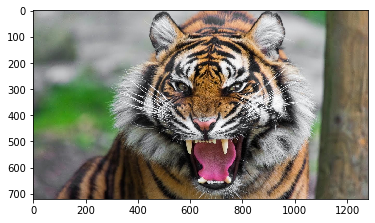

In [2]:
img_path = "tiger.png"
img = plt.imread(img_path)
print(img.shape)
plt.imshow(img)

# Convert gray scale to show to reveal how segmentation works

(720, 1280)


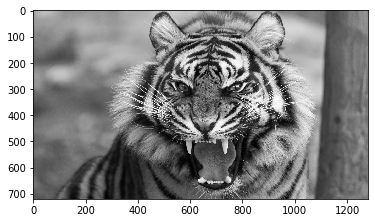

In [3]:
gray = rgb2gray(img)
print(gray.shape)
plt.imshow(gray, cmap='gray')

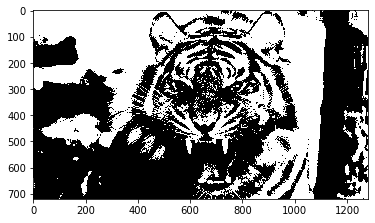

In [4]:
#Flatten to one dim

gray_r = gray.reshape(gray.shape[0]*gray.shape[1])

# based on the mean value to make segmentation
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
        
# reshape to 2 channel back
gray = gray_r.reshape(gray.shape[0],gray.shape[1])

# show image
plt.imshow(gray, cmap='gray')

# multiple threshold

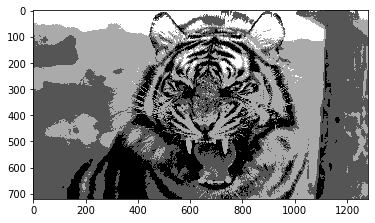

In [5]:
gray = rgb2gray(img)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])

# 3 threshold and make 4 segment
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
        
        
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

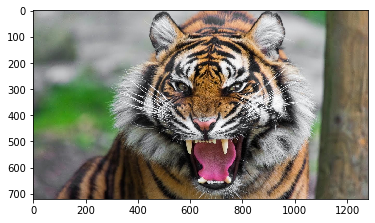

In [6]:
image = plt.imread(img_path) # you need to define your own img path here

plt.imshow(image)

# 2 filters one stands for horizotal and the other stands for vertical

In [8]:
# Converting to grayscale

gray = rgb2gray(image)


# to detect horizontal edge
sobel_horizontal = np.array([np.array([1, 2, 1]),
                    np.array([-2, 0, 1]),
                    np.array([-1, 0, 1])])

print(sobel_horizontal, 'is a kernel for dtecting horizontal edges')

# to detect vertical edge

sobel_vertical = np.array([np.array([-1, 0, 1]),
                         np.array([-2, 0, 2]),
                         np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [-2  0  1]
 [-1  0  1]] is a kernel for dtecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


# Slide through the filter on image

In [10]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')

# Show image for horizontal edge detection

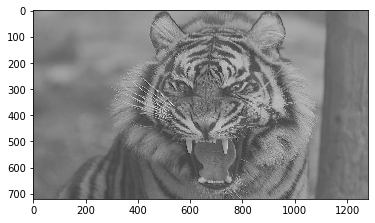

In [11]:
plt.imshow(out_h, cmap='gray')

# Show image for vertical edge detection

And observe the differences in the two

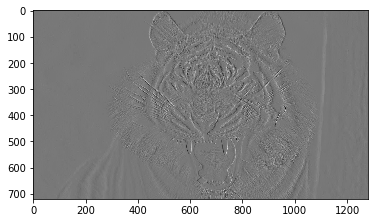

In [12]:
plt.imshow(out_v, cmap='gray')

# Capture vertical and horizontal edge detection

In [15]:
kernel_laplace = np.array([np.array([1, 0, 1]),
                          np.array([1, -8, 1]),
                         np.array([1, 1, 1])])

print(kernel_laplace, 'is a laplacian kernel')

[[ 1  0  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


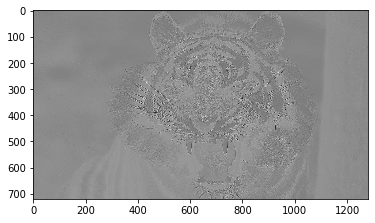

In [16]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

# We use k-mean algorithm to cluster in to 16 colors

(720, 1280, 3)


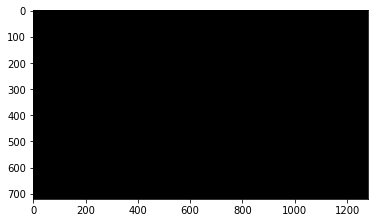

In [39]:
pic = plt.imread("tiger.png")/255 # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [40]:
# To use K-mean, we need to convert 3 to 2 dimensional channel like below
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape


(921600, 3)

In [43]:
from sklearn.cluster import KMeans

# fit the k-mean algorithm on the reshaped array
# we choose 16 cluster her

kmeans = KMeans(n_clusters=16, random_state=0).fit(pic_n)

# we use below method to get image back
pic2show = kmeans.cluster_centers_[kmeans.labels_]
pic2show.show()

array([[0.00233512, 0.00237945, 0.0023477 ],
       [0.00233512, 0.00237945, 0.0023477 ],
       [0.00233512, 0.00237945, 0.0023477 ],
       ...,
       [0.00163802, 0.00163416, 0.00156246],
       [0.00163802, 0.00163416, 0.00156246],
       [0.0019715 , 0.00202993, 0.00186473]], dtype=float32)

# Let's see the result 

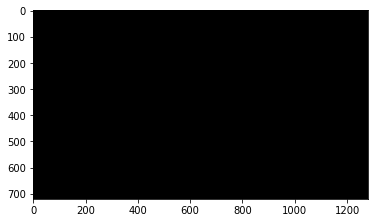

In [42]:
# Convert back to 3 channel
cluster_pic = pic2show.reshape(pic.shape[0],
                              pic.shape[1],
                              pic.shape[2])
plt.imshow(cluster_pic)
